In [1]:
from keras.datasets import imdb
# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data (num_words = 10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(type([max(sequence) for sequence in train_data]))

<class 'list'>


In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index()

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [8]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # Creates an a ll zero matrix of shape (len(sequences),10K)
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1 # Sets specific indices of results[i] to 1s
  return results
# Vectorize training Data
X_train = vectorize_sequences(train_data)
# Vectorize testing Data
X_test = vectorize_sequences(test_data)
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
X_train.shape

(25000, 10000)

In [11]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
from keras import optimizers
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])

In [16]:
# Input for Validation
X_val = X_train[:10000]
partial_X_train = X_train[10000:]
# Labels for validation
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
history = model.fit(partial_X_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(X_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - binary_accuracy: 0.7014 - loss: 0.5977 - val_binary_accuracy: 0.8658 - val_loss: 0.3870
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - binary_accuracy: 0.8899 - loss: 0.3300 - val_binary_accuracy: 0.8742 - val_loss: 0.3260
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - binary_accuracy: 0.9208 - loss: 0.2413 - val_binary_accuracy: 0.8824 - val_loss: 0.2961
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - binary_accuracy: 0.9416 - loss: 0.1859 - val_binary_accuracy: 0.8858 - val_loss: 0.2873
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - binary_accuracy: 0.9522 - loss: 0.1515 - val_binary_accuracy: 0.8882 - val_loss: 0.2790
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - binary_accuracy: 0.9617 - loss: 0.1300 - val_binary_accuracy: 0.8817 - val_loss: 0.3022
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - binary_accuracy: 0.9676 - loss: 0.1117 - val_binary_accuracy: 0.8821 - val_loss: 0.3014
Epoch 8/20
30

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

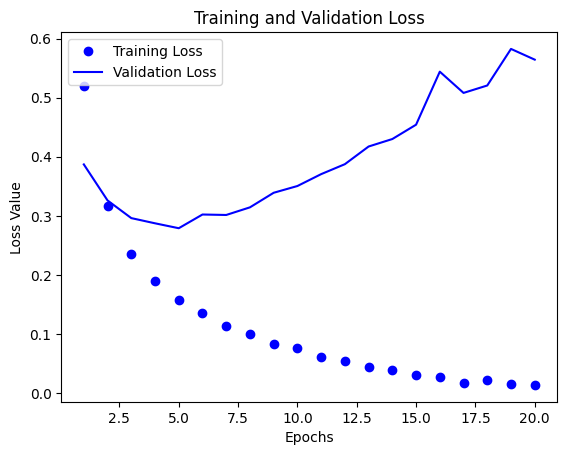

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting losses
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

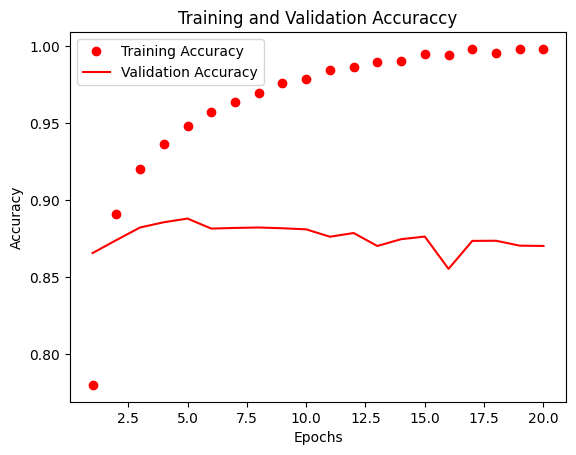

In [21]:
# Training and Validation Accuracy
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [22]:
model.fit(partial_X_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(X_val, y_val))

Epoch 1/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - binary_accuracy: 0.9997 - loss: 0.0077 - val_binary_accuracy: 0.8672 - val_loss: 0.5897
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - binary_accuracy: 0.9998 - loss: 0.0062 - val_binary_accuracy: 0.8700 - val_loss: 0.6059
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - binary_accuracy: 0.9988 - loss: 0.0092 - val_binary_accuracy: 0.8717 - val_loss: 0.6303


In [23]:
# Making Predictions for testing data
np.set_printoptions(suppress=True)
result = model.predict(X_test)
result

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.0258916 ],
       [1.        ],
       [0.99836534],
       ...,
       [0.00211712],
       [0.00605661],
       [0.98619914]], dtype=float32)

In [25]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
  y_pred[i] = 1 if score > 0.5 else 0
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred, y_test)

# Error
mae

0.14132